In [119]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [54]:
#reding inn csv files
data = pd.read_csv("Property_Features_Data.csv")

In [55]:
#oneh ot encoding propery type
one_hot_encode_property = pd.get_dummies(data["Property Type"], prefix='Property')
data = pd.concat([data, one_hot_encode_property ], axis=1).drop('Property Type', axis=1)

In [60]:
#binary encoding Zip Code
mlb = MultiLabelBinarizer()
zip_cols = mlb.fit_transform(data['Zip Code'].astype(str))
zip_df = pd.DataFrame(zip_cols)
zip_df.columns = ["zip_1","zip_2","zip_3","zip_4","zip_5","zip_6","zip_7","zip_8","zip_9","zip_10","zip_11","zip_12","zip_13","zip_14"]
data = pd.concat([data, zip_df], axis=1).drop('Zip Code', axis=1)

In [103]:
#filling na cols with mean or median col values
data['Stories'] = data['Stories'].fillna(data['Stories'].mean())
data['Lot Area'] = data['Lot Area'].fillna(data['Lot Area'].mean())
data['beds'] = data['beds'].fillna(data['beds'].mean())
data['baths'] = data['baths'].fillna(data['baths'].mean())
data['Year Built'] = data['Year Built'].fillna(data['Year Built'].median())

In [ ]:
#dropping rows with nan price values (only 4)
data = data.dropna(subset=['price'])

In [108]:
x = data.loc[:, ~data.columns.isin(['price','links'])]
y = data["price"]

In [109]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8,test_size=0.2, random_state=0)

In [110]:
from sklearn.ensemble import RandomForestRegressor
  
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [115]:
y_pred_test = regressor.predict(X_test)

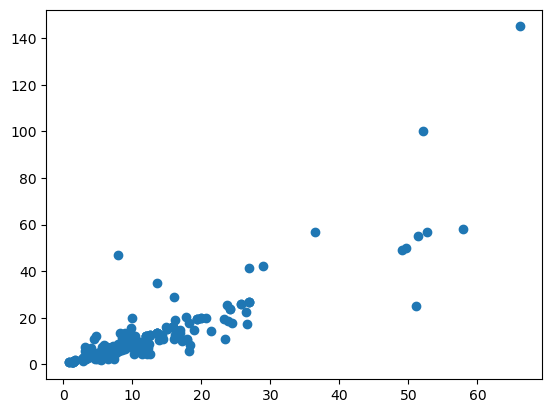

In [124]:
plt.scatter(y_pred_test/100000,y_test/100000)